In [ ]:
!pip install torch torchvision timm astropy scikit-learn tqdm seaborn pandas

In [1]:
import os
from astropy.io import fits
import pandas as pd

# Define paths
dataset_path = '/home/parlange/datasets/mini_sample/images'
metadata_path = '/home/parlange/datasets/mini_sample/'

# Function to analyze FITS files
def analyze_fits_files(directory):
    fits_data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.fits'):
                file_path = os.path.join(root, file)
                try:
                    with fits.open(file_path) as hdul:
                        header = hdul[0].header
                        fits_data.append({
                            'File': file_path,
                            'Dimensions': hdul[0].data.shape if hdul[0].data is not None else None,
                            'Bitpix': header.get('BITPIX'),
                            'NAXIS': header.get('NAXIS'),
                            'Object': header.get('OBJECT', 'Unknown'),
                            'Instrument': header.get('INSTRUME', 'Unknown'),
                            'Date': header.get('DATE-OBS', 'Unknown')
                        })
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    return fits_data

# Analyze FITS files in both directories
images_fits_data = analyze_fits_files(dataset_path)
metadata_fits_data = analyze_fits_files(metadata_path)

# Combine results and create a DataFrame
fits_analysis_df = pd.DataFrame(images_fits_data)
metadata_analysis_df = pd.DataFrame(metadata_fits_data)

# Save the analysis results to a CSV file
output_csv_path = 'fits_files_analysis.csv'
fits_analysis_df.to_csv(output_csv_path, index=False)
metadata_analysis_df.to_csv(output_csv_path, index=False)

# Display the DataFrame
fits_analysis_df
metadata_analysis_df

,File,Dimensions,Bitpix,NAXIS,Object,Instrument,Date
0,/home/parlange/datasets/mini_sample/metadata_c...,None,8,0,Unknown,Unknown,Unknown
1,/home/parlange/datasets/mini_sample/images/ima...,"(20000, 61, 61)",-64,3,Unknown,Unknown,Unknown
2,/home/parlange/datasets/mini_sample/images/ima...,"(20000, 61, 61)",-64,3,Unknown,Unknown,Unknown
3,/home/parlange/datasets/mini_sample/images/ima...,"(20000, 61, 61)",-64,3,Unknown,Unknown,Unknown
4,/home/parlange/datasets/mini_sample/images/ima...,"(20000, 61, 61)",-64,3,Unknown,Unknown,Unknown
5,/home/parlange/datasets/mini_sample/images/ima...,"(20000, 61, 61)",-64,3,Unknown,Unknown,Unknown


In [2]:
print("Images DataFrame:")
print(images_df['File'].head())

print("\nMetadata DataFrame:")
print(metadata_df['File'].head())


Images DataFrame:


NameError: name 'images_df' is not defined

In [ ]:
fits.info('/home/parlange/datasets/mini_sample/metadata_catalog.fits')

In [3]:
hdul = fits.open('/home/parlange/datasets/mini_sample/metadata_catalog.fits')
print(hdul[1].columns)

ColDefs(
    name = 'label'; format = 'D'
    name = 'z_l'; format = 'D'
    name = 'z_s'; format = 'D'
    name = 'vel_disp'; format = 'D'
    name = 'logM'; format = 'D'
    name = 'theta_e'; format = 'D'
    name = 'source_mag'; format = 'D'
    name = 'lens_mag'; format = 'D'
)


In [4]:
fits.info('/home/parlange/datasets/mini_sample/images/image_catalog_g.fits')
fits.info('/home/parlange/datasets/mini_sample/images/image_catalog_r.fits')
fits.info('/home/parlange/datasets/mini_sample/images/image_catalog_i.fits')
fits.info('/home/parlange/datasets/mini_sample/images/image_catalog_z.fits')
fits.info('/home/parlange/datasets/mini_sample/images/image_catalog_y.fits')

Filename: /home/parlange/datasets/mini_sample/images/image_catalog_g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (61, 61, 20000)   float64   
Filename: /home/parlange/datasets/mini_sample/images/image_catalog_r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (61, 61, 20000)   float64   
Filename: /home/parlange/datasets/mini_sample/images/image_catalog_i.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (61, 61, 20000)   float64   
Filename: /home/parlange/datasets/mini_sample/images/image_catalog_z.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (61, 61, 20000)   float64   
Filename: /home/parlange/datasets/mini_sample/images/image_catalog_y.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     

In [5]:
# Load the FITS file
fits_file = '/home/parlange/datasets/mini_sample/metadata_catalog.fits'
with fits.open(fits_file) as hdul:
    # Access the table data
    data = hdul[1].data

# Convert all columns to a pandas DataFrame
columns = data.columns.names  # Get all column names
data_dict = {col: data[col] for col in columns}  # Extract data for all columns
df = pd.DataFrame(data_dict)

# Save all parameters to a CSV file
output_csv = '/home/parlange/datasets/mini_sample/labels_parameters.csv'
df.to_csv(output_csv, index=False)

print(f"All parameters extracted and saved as '{output_csv}'")

All parameters extracted and saved as '/home/parlange/datasets/mini_sample/labels_parameters.csv'


In [6]:
!nvidia-smi

Fri Dec 20 03:35:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.05              Driver Version: 560.35.05      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0 Off |                  N/A |
| 99%   65C    P8             50W /  390W |      18MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import timm
import numpy as np
from astropy.io import fits
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
from torchvision import transforms
from torchvision.transforms import RandomApply

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

import pandas as pd  # For DataFrame handling
from IPython.display import display  # For displaying DataFrames in Jupyter

# Suppress potential warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

def initialize_model(model_name, num_classes, pretrained=False, stochastic_depth_prob=0.1, 
                    fine_tune_mode="classification_head", last_n=6):
    """
    Initialize a model from the given model_name without ImageNet pretraining and
    allow for a custom number of input channels (5).

    Args:
        model_name (str): One of [ViT, CaiT, DeiT, DeiT3, Swin, Twins_SVT, Twins_PCPVT, PiT, MLP-Mixer].
        num_classes (int): Number of output classes.
        pretrained (bool): Whether to load a pretrained model. Here we set it to False.
        stochastic_depth_prob (float): The stochastic depth probability for supported models.
        fine_tune_mode (str): 'classification_head', 'last_n_blocks', 'half', or 'all_blocks'.
        last_n (int): Number of blocks/layers to unfreeze if using 'last_n_blocks'.

    Returns:
        model: The initialized and partially unfrozen model.
    """
    def freeze_all(model):
        for p in model.parameters():
            p.requires_grad = False

    def unfreeze_head(model):
        if hasattr(model, 'head') and isinstance(model.head, nn.Module):
            for p in model.head.parameters():
                p.requires_grad = True
        elif hasattr(model, 'classifier') and isinstance(model.classifier, nn.Module):
            for p in model.classifier.parameters():
                p.requires_grad = True
        elif hasattr(model, 'classifier_head') and isinstance(model.classifier_head, nn.Module):
            for p in model.classifier_head.parameters():
                p.requires_grad = True
        else:
            # Fallback: find a module containing 'head' or 'classifier'
            for name, module in model.named_modules():
                if 'head' in name or 'classifier' in name:
                    for p in module.parameters():
                        p.requires_grad = True

    def unfreeze_last_n_blocks(blocks, n):
        if n > len(blocks):
            n = len(blocks)
        for block in blocks[-n:]:
            for p in block.parameters():
                p.requires_grad = True

    def unfreeze_half_blocks(blocks):
        n = len(blocks) // 2
        unfreeze_last_n_blocks(blocks, n)

    def unfreeze_all_blocks(blocks):
        for block in blocks:
            for p in block.parameters():
                p.requires_grad = True

    # Initialize the model with 5 input channels and no pretrained weights
    if model_name == 'ViT':
        model = timm.create_model('vit_base_patch16_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'CaiT':
        model = timm.create_model('cait_s24_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'DeiT':
        model = timm.create_model('deit_base_patch16_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'DeiT3':
        model = timm.create_model('deit3_base_patch16_224',
                                  pretrained=pretrained,
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'Swin':
        model = timm.create_model('swin_base_patch4_window7_224',
                                  pretrained=pretrained,
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob,
                                  num_classes=num_classes)
        ft_attr = 'layers'
    elif model_name == 'Twins_SVT':
        model = timm.create_model('twins_svt_base',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'stages' if hasattr(model, 'stages') else None
    elif model_name == 'Twins_PCPVT':
        model = timm.create_model('twins_pcpvt_base',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'stages' if hasattr(model, 'stages') else None
    elif model_name == 'PiT':
        model = timm.create_model('pit_b_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'MLP-Mixer':
        model = timm.create_model('mixer_b16_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    else:
        raise ValueError(f"Model {model_name} not recognized.")

    # Freeze everything initially
    freeze_all(model)
    # Unfreeze the classification head
    unfreeze_head(model)

    if fine_tune_mode == "classification_head":
        return model

    # Otherwise, unfreeze more parameters according to the chosen mode
    if fine_tune_mode == "all_blocks":
        if ft_attr and hasattr(model, ft_attr):
            blocks = getattr(model, ft_attr)
            unfreeze_all_blocks(blocks)
        else:
            # Fallback: parameter-based unfreezing
            for n, p in model.named_parameters():
                if not p.requires_grad:
                    p.requires_grad = True
    elif fine_tune_mode == "last_n_blocks":
        if ft_attr and hasattr(model, ft_attr):
            blocks = getattr(model, ft_attr)
            unfreeze_last_n_blocks(blocks, last_n)
        else:
            # Fallback: parameter-based unfreezing
            all_params = list(model.named_parameters())
            frozen = [(n, p) for (n, p) in all_params if not p.requires_grad]
            if last_n > len(frozen):
                last_n = len(frozen)
            for (n, p) in frozen[-last_n:]:
                p.requires_grad = True
    elif fine_tune_mode == "half":
        if ft_attr and hasattr(model, ft_attr):
            blocks = getattr(model, ft_attr)
            unfreeze_half_blocks(blocks)
        else:
            # Fallback: parameter-based unfreezing
            all_params = list(model.named_parameters())
            frozen = [(n, p) for (n, p) in all_params if not p.requires_grad]
            half_n = len(frozen) // 2
            for (n, p) in frozen[-half_n:]:
                p.requires_grad = True
    else:
        raise ValueError("fine_tune_mode must be one of: 'classification_head', 'last_n_blocks', 'half', 'all_blocks'")

    return model

def save_checkpoint(model, optimizer, epoch, val_loss, fold, model_name, checkpoints_dir="checkpoints"):
    """
    Save the model checkpoint.

    Args:
        model: The model to save.
        optimizer: The optimizer state.
        epoch (int): Current epoch number.
        val_loss (float): Validation loss.
        fold (int): Current fold number.
        model_name (str): Name of the model.
        checkpoints_dir (str): Directory to save checkpoints.
    """
    os.makedirs(checkpoints_dir, exist_ok=True)
    model_to_save = model.module if hasattr(model, 'module') else model
    checkpoint_path = os.path.join(checkpoints_dir, f"model_{model_name}_fold_{fold+1}_best.pth")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model_to_save.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_loss': val_loss
    }, checkpoint_path)
    print(f"Checkpoint saved at {checkpoint_path}")

def train_one_fold(model, train_loader, val_loader, device, num_epochs=2, patience=1, fold=0, model_name="model"):
    """
    Train the model for one fold.

    Args:
        model: The model to train.
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        device: Device to train on.
        num_epochs (int): Maximum number of epochs.
        patience (int): Early stopping patience.
        fold (int): Current fold number.
        model_name (str): Name of the model.

    Returns:
        history (dict): Training and validation loss and accuracy history.
        all_labels_np (np.ndarray): True labels.
        all_preds_np (np.ndarray): Predicted labels.
        all_preds_probs (np.ndarray): Predicted probabilities.
        auc_roc (float): ROC AUC score.
        f1 (float): F1 score.
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-3)  # Reduced lr and wd

    best_loss = float('inf')
    epochs_no_improve = 0

    # For storing metrics
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    all_preds = []
    all_labels = []
    all_probs = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0

        # Progress bar for training
        train_iter = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)
        for X_batch, y_batch in train_iter:
            X_batch = X_batch.to(device, non_blocking=True)
            y_batch = y_batch.to(device, non_blocking=True)
            optimizer.zero_grad()

            outputs = model(X_batch)
            
            # Check outputs for NaN or Inf
            if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                print("Model outputs contain NaN or Inf.")
                raise ValueError("Invalid model outputs.")

            loss = criterion(outputs, y_batch)
            
            # Check loss for NaN or Inf
            if torch.isnan(loss) or torch.isinf(loss):
                print("Loss is NaN or Inf.")
                raise ValueError("Invalid loss.")

            loss.backward()
            
            # Check gradients for NaN or Inf
            for name, param in model.named_parameters():
                if param.grad is not None:
                    if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
                        print(f"Gradient issue in parameter: {name}")
                        raise ValueError("Invalid gradients.")

            # Clip gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()

            running_loss += loss.item() * X_batch.size(0)
            preds = outputs.argmax(dim=1)
            correct_train += (preds == y_batch).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct_train / len(train_loader.dataset)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        preds_list = []
        labels_list = []
        probs_list = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val = X_val.to(device, non_blocking=True)
                y_val = y_val.to(device, non_blocking=True)
                outputs = model(X_val)
                
                # Check outputs for NaN or Inf
                if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                    print("Validation model outputs contain NaN or Inf.")
                    raise ValueError("Invalid validation model outputs.")

                loss = criterion(outputs, y_val)
                
                # Check loss for NaN or Inf
                if torch.isnan(loss) or torch.isinf(loss):
                    print("Validation loss is NaN or Inf.")
                    raise ValueError("Invalid validation loss.")

                val_loss += loss.item() * X_val.size(0)
                preds = outputs.argmax(dim=1)
                correct_val += (preds == y_val).sum().item()

                preds_list.extend(preds.cpu().numpy())
                labels_list.extend(y_val.cpu().numpy())

                probs = torch.softmax(outputs, dim=1)
                probs_list.extend(probs.cpu().numpy())

        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / len(val_loader.dataset)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        all_preds.extend(preds_list)
        all_labels.extend(labels_list)
        all_probs.extend(probs_list)

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")

        # Checkpoint if best
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
            save_checkpoint(model, optimizer, epoch, val_loss, fold, model_name)
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print("Early stopping triggered.")
                break

    # After training, compute metrics
    # Assuming multi-class classification
    num_classes = model.module.head.out_features if hasattr(model, 'module') else model.head.out_features
    all_labels_np = np.array(all_labels)
    all_preds_np = np.array(all_preds)
    all_probs_np = np.array(all_probs)

    # Binarize the labels for ROC AUC
    all_labels_binarized = label_binarize(all_labels_np, classes=np.arange(num_classes))
    if all_labels_binarized.shape[1] == 1:
        # Handle binary classification case
        all_labels_binarized = np.hstack((1 - all_labels_binarized, all_labels_binarized))

    # Compute ROC AUC
    try:
        auc_roc = roc_auc_score(all_labels_binarized, all_probs_np, average='macro', multi_class='ovr')
    except ValueError:
        auc_roc = float('nan')  # Handle cases where ROC AUC cannot be computed

    # Compute F1 Score
    f1 = f1_score(all_labels_np, all_preds_np, average='macro')

    return history, all_labels_np, all_preds_np, all_probs_np, auc_roc, f1

def compute_channel_stats(X_tensor):
    """
    Compute per-channel mean and standard deviation.

    Args:
        X_tensor (torch.Tensor): Input tensor of shape (N, C, H, W).

    Returns:
        means (torch.Tensor): Mean for each channel.
        stds (torch.Tensor): Standard deviation for each channel.
    """
    # Compute per-channel mean and std
    means = X_tensor.mean(dim=(0, 2, 3))
    stds = X_tensor.std(dim=(0, 2, 3))
    return means, stds

class FITSDataset(Dataset):
    def __init__(self, X, y, transform=None):
        """
        Initialize the FITSDataset.

        Args:
            X (torch.Tensor): Input images tensor of shape (N, C, H, W).
            y (torch.Tensor): Labels tensor of shape (N,).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        img = self.X[idx]  # (5, H, W) tensor
        if self.transform is not None:
            img = self.transform(img)
        label = self.y[idx]
        return img, label

def plot_combined_metrics(fpr, tpr, roc_auc, cm, classes, model_name, fold, model_color, save_dir="plots"):
    """
    Plot and save the ROC curve on the left and the Confusion Matrix on the right.
    Also displays the figure inline.
    
    Args:
        fpr (dict): False positive rates for each class.
        tpr (dict): True positive rates for each class.
        roc_auc (dict): AUC scores for each class.
        cm (np.ndarray): Confusion matrix.
        classes (list or np.ndarray): List of class labels.
        model_name (str): Name of the model.
        fold (int): Fold number.
        model_color (str): Color assigned to the model.
        save_dir (str): Directory to save the plot.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from itertools import cycle

    os.makedirs(save_dir, exist_ok=True)
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # === Left Subplot: ROC Curve ===
    ax1 = axes[0]
    if len(classes) == 2:
        # Binary classification: plot ROC for the positive class only
        pos_class = classes[1]  # Assuming the second class is the positive class
        ax1.plot(fpr[1], tpr[1], color=model_color,
                 lw=2, label=f'ROC curve (AUC = {roc_auc[1]:0.2f})')
        ax1.plot([0, 1], [0, 1], 'k--', lw=2)
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-0.05, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'ROC Curve for {model_name} Fold {fold+1}', color='black')
        ax1.legend(loc="lower right")
    else:
        # Multi-class classification: plot ROC for each class using model_color and different line styles
        line_styles = cycle(['-', '--', '-.', ':', '-', '--', '-.', ':', '-'])
        for i, ls in zip(range(len(classes)), line_styles):
            ax1.plot(fpr[i], tpr[i], color=model_color, linestyle=ls, lw=2,
                     label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:0.2f})')
        ax1.plot([0, 1], [0, 1], 'k--', lw=2)
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-0.05, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'ROC Curves for {model_name} Fold {fold+1}', color='black')
        ax1.legend(loc="lower right")
    
    # === Right Subplot: Confusion Matrix ===
    ax2 = axes[1]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes, ax=ax2)
    ax2.set_ylabel('Actual')
    ax2.set_xlabel('Predicted')
    ax2.set_title(f'Confusion Matrix for {model_name} Fold {fold+1}', color='black')
    
    plt.tight_layout()
    
    # Save the figure
    save_path = os.path.join(save_dir, f'combined_metrics_{model_name}_fold_{fold+1}.png')
    plt.savefig(save_path)
    print(f"Combined metrics saved at {save_path}")
    
    # Display the figure inline
    display(fig)
    
    # Close the figure to free memory
    plt.close()

def plot_learning_curves(history, model_name, fold, model_color, save_dir="plots"):
    """
    Plot and save the learning curves. Also display them inline.
    
    Args:
        history (dict): Dictionary containing training and validation loss and accuracy.
        model_name (str): Name of the model.
        fold (int): Fold number.
        model_color (str): Color assigned to the model.
        save_dir (str): Directory to save the plot.
    """
    os.makedirs(save_dir, exist_ok=True)
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12,5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'o-', color='grey', label='Training loss')
    plt.plot(epochs, history['val_loss'], 's-', color=model_color, label='Validation loss')
    plt.title(f'Training and Validation Loss for {model_name} Fold {fold+1}', color='black')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], 'o-', color='grey', label='Training accuracy')
    plt.plot(epochs, history['val_acc'], 's-', color=model_color, label='Validation accuracy')
    plt.title(f'Training and Validation Accuracy for {model_name} Fold {fold+1}', color='black')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    
    # Save the figure
    save_path = os.path.join(save_dir, f'learning_curves_{model_name}_fold_{fold+1}.png')
    plt.savefig(save_path)
    print(f"Learning curves saved at {save_path}")
    
    # Display the figure inline
    display(plt.gcf())
    
    # Close the figure to free memory
    plt.close()

def plot_aggregated_roc_curves(model_roc_data, num_classes, save_dir="plots"):
    """
    Plot aggregated ROC curves for all models.

    Args:
        model_roc_data (dict): Dictionary where keys are model names and values are lists of (fpr, tpr) tuples per fold.
        num_classes (int): Number of classes.
        save_dir (str): Directory to save the plot.
    """
    os.makedirs(save_dir, exist_ok=True)
    plt.figure(figsize=(12, 8))

    colors = {
        'ViT': 'crimson',
        'MLP-Mixer': 'tomato',
        'CvT': 'darkred',
        'Swin': 'indigo',
        'CaiT': 'royalblue',
        'DeiT': 'cadetblue',
        'DeiT3': 'dodgerblue',
        'Twins_SVT': 'lightgreen',
        'Twins_PCPVT': 'mediumseagreen',
        'PiT': 'dimgrey',
        'Ensemble': 'darkgoldenrod',
        'Random': 'black'
    }

    for model_name, roc_list in model_roc_data.items():
        if not roc_list:
            continue  # Skip models with no ROC data
        # Aggregate ROC by averaging TPRs at common FPR points
        mean_fpr = np.linspace(0, 1, 100)
        tprs = []
        for fpr, tpr in roc_list:
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0  # Ensure TPR starts at 0
            tprs.append(interp_tpr)
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0  # Ensure TPR ends at 1
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color=colors.get(model_name, 'black'),
                 lw=2, label=f'{model_name} (AUC = {mean_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Aggregated ROC Curves for All Models')
    plt.legend(loc="lower right")
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, f'aggregated_roc_curves.png')
    plt.savefig(save_path)
    print(f"Aggregated ROC curves saved at {save_path}")

    # Display the figure inline
    display(plt.gcf())

    # Close the figure to free memory
    plt.close()

def plot_combined_metrics(fpr, tpr, roc_auc, cm, classes, model_name, fold, model_color, save_dir="plots"):
    """
    Plot and save the ROC curve on the left and the Confusion Matrix on the right.
    Also displays the figure inline.
    
    Args:
        fpr (dict): False positive rates for each class.
        tpr (dict): True positive rates for each class.
        roc_auc (dict): AUC scores for each class.
        cm (np.ndarray): Confusion matrix.
        classes (list or np.ndarray): List of class labels.
        model_name (str): Name of the model.
        fold (int): Fold number.
        model_color (str): Color assigned to the model.
        save_dir (str): Directory to save the plot.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from itertools import cycle

    os.makedirs(save_dir, exist_ok=True)
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # === Left Subplot: ROC Curve ===
    ax1 = axes[0]
    if len(classes) == 2:
        # Binary classification: plot ROC for the positive class only
        pos_class = classes[1]  # Assuming the second class is the positive class
        ax1.plot(fpr[1], tpr[1], color=model_color,
                 lw=2, label=f'ROC curve (AUC = {roc_auc[1]:0.2f})')
        ax1.plot([0, 1], [0, 1], 'k--', lw=2)
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-0.05, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'ROC Curve for {model_name} Fold {fold+1}', color='black')
        ax1.legend(loc="lower right")
    else:
        # Multi-class classification: plot ROC for each class using model_color and different line styles
        line_styles = cycle(['-', '--', '-.', ':', '-', '--', '-.', ':', '-'])
        for i, ls in zip(range(len(classes)), line_styles):
            ax1.plot(fpr[i], tpr[i], color=model_color, linestyle=ls, lw=2,
                     label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:0.2f})')
        ax1.plot([0, 1], [0, 1], 'k--', lw=2)
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-0.05, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'ROC Curves for {model_name} Fold {fold+1}', color='black')
        ax1.legend(loc="lower right")
    
    # === Right Subplot: Confusion Matrix ===
    ax2 = axes[1]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes, ax=ax2)
    ax2.set_ylabel('Actual')
    ax2.set_xlabel('Predicted')
    ax2.set_title(f'Confusion Matrix for {model_name} Fold {fold+1}', color='black')
    
    plt.tight_layout()
    
    # Save the figure
    save_path = os.path.join(save_dir, f'combined_metrics_{model_name}_fold_{fold+1}.png')
    plt.savefig(save_path)
    print(f"Combined metrics saved at {save_path}")
    
    # Display the figure inline
    display(fig)
    
    # Close the figure to free memory
    plt.close()

def plot_learning_curves(history, model_name, fold, model_color, save_dir="plots"):
    """
    Plot and save the learning curves. Also display them inline.
    
    Args:
        history (dict): Dictionary containing training and validation loss and accuracy.
        model_name (str): Name of the model.
        fold (int): Fold number.
        model_color (str): Color assigned to the model.
        save_dir (str): Directory to save the plot.
    """
    os.makedirs(save_dir, exist_ok=True)
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12,5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'o-', color='grey', label='Training loss')
    plt.plot(epochs, history['val_loss'], 's-', color=model_color, label='Validation loss')
    plt.title(f'Training and Validation Loss for {model_name} Fold {fold+1}', color=model_color)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], 'o-', color='grey', label='Training accuracy')
    plt.plot(epochs, history['val_acc'], 's-', color=model_color, label='Validation accuracy')
    plt.title(f'Training and Validation Accuracy for {model_name} Fold {fold+1}', color=model_color)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    
    # Save the figure
    save_path = os.path.join(save_dir, f'learning_curves_{model_name}_fold_{fold+1}.png')
    plt.savefig(save_path)
    print(f"Learning curves saved at {save_path}")
    
    # Display the figure inline
    display(plt.gcf())
    
    # Close the figure to free memory
    plt.close()

def plot_aggregated_roc_curves(model_roc_data, num_classes, save_dir="plots"):
    """
    Plot aggregated ROC curves for all models.

    Args:
        model_roc_data (dict): Dictionary where keys are model names and values are lists of (fpr, tpr) tuples per fold.
        num_classes (int): Number of classes.
        save_dir (str): Directory to save the plot.
    """
    os.makedirs(save_dir, exist_ok=True)
    plt.figure(figsize=(12, 8))

    colors = {
        'ViT': 'crimson',
        'MLP-Mixer': 'tomato',
        'CvT': 'darkred',
        'Swin': 'indigo',
        'CaiT': 'royalblue',
        'DeiT': 'cadetblue',
        'DeiT3': 'dodgerblue',
        'Twins_SVT': 'lightgreen',
        'Twins_PCPVT': 'mediumseagreen',
        'PiT': 'dimgrey',
        'Ensemble': 'darkgoldenrod',
        'Random': 'black'
    }

    for model_name, roc_list in model_roc_data.items():
        if not roc_list:
            continue  # Skip models with no ROC data
        # Aggregate ROC by averaging TPRs at common FPR points
        mean_fpr = np.linspace(0, 1, 100)
        tprs = []
        for fpr, tpr in roc_list:
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0  # Ensure TPR starts at 0
            tprs.append(interp_tpr)
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0  # Ensure TPR ends at 1
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color=colors.get(model_name, 'black'),
                 lw=2, label=f'{model_name} (AUC = {mean_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Aggregated ROC Curves for All Models')
    plt.legend(loc="lower right")
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, f'aggregated_roc_curves.png')
    plt.savefig(save_path)
    print(f"Aggregated ROC curves saved at {save_path}")

    # Display the figure inline
    display(plt.gcf())

    # Close the figure to free memory
    plt.close()

if __name__ == "__main__":
    images_dir = "/home/parlange/datasets/mini_sample/images"
    metadata_file = "/home/parlange/datasets/mini_sample/metadata_catalog.fits"

    bands = ['g', 'r', 'i', 'z', 'y']
    image_files = {
        'g': 'image_catalog_g.fits',
        'r': 'image_catalog_r.fits',
        'i': 'image_catalog_i.fits',
        'z': 'image_catalog_z.fits',
        'y': 'image_catalog_y.fits'
    }

    band_data = []
    shapes = []
    for b in bands:
        file_path = os.path.join(images_dir, image_files[b])
        with fits.open(file_path) as hdul:
            data = hdul[0].data
            print(f"Shape for {b} band: {data.shape}")
            # Replace NaN and Inf with zeros
            data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)
            band_data.append(data)
            shapes.append(data.shape)

    unique_shapes = set(shapes)
    if len(unique_shapes) != 1:
        raise ValueError(f"Inconsistent shapes among bands: {unique_shapes}")

    X = np.stack(band_data, axis=1)
    print("Final X shape:", X.shape)

    with fits.open(metadata_file) as hdul:
        meta_data = hdul[1].data
        y = np.array(meta_data['label'])
        print("y shape:", y.shape)

    y = y.astype(np.int64)

    X_tensor = torch.from_numpy(X).float()   # (N, 5, H, W)
    y_tensor = torch.from_numpy(y).long()    # (N,)

    # Check for remaining NaNs or Infs
    if torch.isnan(X_tensor).any():
        print("X_tensor contains NaN values. Replacing with 0.")
        X_tensor = torch.nan_to_num(X_tensor, nan=0.0, posinf=0.0, neginf=0.0)
    if torch.isinf(X_tensor).any():
        print("X_tensor contains Inf values. Replacing with 0.")
        X_tensor = torch.nan_to_num(X_tensor, nan=0.0, posinf=0.0, neginf=0.0)

    # Compute channel statistics
    means, stds = compute_channel_stats(X_tensor)
    print("Per-channel means:", means)
    print("Per-channel stds:", stds)

    # Check for NaN or Inf in means and stds
    if torch.isnan(means).any() or torch.isnan(stds).any():
        print("Computed means or stds contain NaN. Replacing with 0.5 and 0.5 respectively.")
        means = torch.where(torch.isnan(means), torch.tensor(0.5), means)
        stds = torch.where(torch.isnan(stds), torch.tensor(0.5), stds)
    if torch.isinf(means).any() or torch.isinf(stds).any():
        print("Computed means or stds contain Inf. Replacing with 1.0 and 1.0 respectively.")
        means = torch.where(torch.isinf(means), torch.tensor(1.0), means)
        stds = torch.where(torch.isinf(stds), torch.tensor(1.0), stds)

    # Define training and validation transforms with normalization
    train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        RandomApply([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomRotation(degrees=30),
            transforms.RandomResizedCrop(size=224, scale=(0.8, 1.2)),
            transforms.RandomPerspective(distortion_scale=0.4, p=0.5),
            transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
        ], p=0.5),
        transforms.Normalize(mean=means.tolist(),
                             std=stds.tolist())
    ])

    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Normalize(mean=means.tolist(),
                             std=stds.tolist())
    ])

    dataset = FITSDataset(X_tensor, y_tensor)
    N = len(dataset)
    num_classes = len(torch.unique(y_tensor))
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')
    if torch.cuda.is_available():
        print(f'Number of GPUs: {torch.cuda.device_count()}')

    # List of models to train
    model_names = ['ViT', 'CaiT', 'DeiT', 'DeiT3', 'Swin', 
                  'Twins_SVT', 'Twins_PCPVT', 'PiT', 'MLP-Mixer']

    # Define per-model fine-tuning configurations with 'last_n_blocks' mode and exact last_n values
    model_config = {
        'ViT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},          # 12 blocks / 2 = 6
        'CaiT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 12},        # 24 blocks / 2 = 12
        'DeiT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},         # 12 blocks / 2 = 6
        'DeiT3': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},        # 12 blocks / 2 = 6
        'Swin': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},         # 12 blocks / 2 = 6
        'Twins_SVT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},    # 12 blocks / 2 = 6
        'Twins_PCPVT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 2},  # 4 blocks / 2 = 2
        'PiT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},          # 12 blocks / 2 = 6
        'MLP-Mixer': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},    # 12 blocks / 2 = 6
    }

    k = 5
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # To store overall results
    model_metrics = {model: {'auc_roc': [], 'f1': []} for model in model_names}
    # To store ROC data for aggregated plotting
    model_roc_data = {model: [] for model in model_names}

    # Define your colors dictionary
    colors = {
        'ViT': 'crimson',
        'MLP-Mixer': 'tomato',
        'CvT': 'darkred',
        'Swin': 'indigo',
        'CaiT': 'royalblue',
        'DeiT': 'cadetblue',
        'DeiT3': 'dodgerblue',
        'Twins_SVT': 'lightgreen',
        'Twins_PCPVT': 'mediumseagreen',
        'PiT': 'dimgrey',
        'Ensemble': 'darkgoldenrod',
        'Random': 'black'
    }

    for model_name in model_names:
        print(f"\n==== Training Model: {model_name} ====\n")
        fold_results = []
        # Iterate through each fold
        for fold, (train_idx, val_idx) in enumerate(skf.split(np.arange(N), y_tensor.cpu().numpy())):
            print(f"\n=== Fold {fold+1}/{k} for model {model_name} ===")
            print(f"Train indices length: {len(train_idx)}, Val indices length: {len(val_idx)}")

            train_subset = Subset(FITSDataset(X_tensor[train_idx], y_tensor[train_idx], transform=train_transform), range(len(train_idx)))
            val_subset = Subset(FITSDataset(X_tensor[val_idx], y_tensor[val_idx], transform=val_transform), range(len(val_idx)))

            pin_memory = torch.cuda.is_available()
            train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=pin_memory)
            val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=4, pin_memory=pin_memory)

            # Get model configuration
            config = model_config.get(model_name, {'fine_tune_mode': 'classification_head', 'last_n': 6})
            fine_tune_mode = config['fine_tune_mode']
            last_n = config['last_n'] if config['last_n'] is not None else 6  # Default to 6 if not set

            # Print the fine-tuning mode and last_n if applicable
            if fine_tune_mode == 'last_n_blocks':
                print(f"Fine-tuning mode: {fine_tune_mode} with last_n={last_n}")
            else:
                print(f"Fine-tuning mode: {fine_tune_mode}")

            model = initialize_model(model_name, num_classes, pretrained=False, fine_tune_mode=fine_tune_mode, last_n=last_n)

            model = model.to(device)
            if torch.cuda.is_available() and torch.cuda.device_count() > 1:
                model = nn.DataParallel(model)
                print("Model wrapped in DataParallel.")

            try:
                history, all_labels_np, all_preds_np, all_preds_probs, auc_roc, f1 = train_one_fold(
                    model, train_loader, val_loader, device, num_epochs=2, patience=1, fold=fold, model_name=model_name
                )
                fold_results.append((auc_roc, f1))
                model_metrics[model_name]['auc_roc'].append(auc_roc)
                model_metrics[model_name]['f1'].append(f1)

                # Retrieve the model's color from the colors dictionary
                model_color = colors.get(model_name, 'black')  # Default to 'black' if not found

                # Plot learning curves
                plot_learning_curves(history, model_name, fold, model_color=model_color)

                # Compute confusion matrix
                cm = confusion_matrix(all_labels_np, all_preds_np)
                # Removed the standalone confusion matrix plot
                # plot_confusion_matrix(cm, classes=np.arange(num_classes), model_name=model_name, fold=fold, model_color=model_color)

                # Compute ROC curves
                # Binarize the labels for ROC
                all_labels_binarized = label_binarize(all_labels_np, classes=np.arange(num_classes))
                if all_labels_binarized.shape[1] == 1:
                    # Handle binary classification case
                    all_labels_binarized = np.hstack((1 - all_labels_binarized, all_labels_binarized))

                fpr = dict()
                tpr = dict()
                roc_auc_dict = dict()
                for i in range(num_classes):
                    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized[:, i], all_preds_probs[:, i])
                    roc_auc_dict[i] = auc(fpr[i], tpr[i])

                # Store ROC data for aggregated plotting
                model_roc_data[model_name].append((fpr, tpr))

                # Plot combined metrics (ROC and Confusion Matrix)
                plot_combined_metrics(fpr, tpr, roc_auc_dict, cm, classes=np.arange(num_classes), 
                                      model_name=model_name, fold=fold, model_color=model_color)

            except ValueError as e:
                print(f"Training stopped due to error: {e}")
                break  # Optionally, continue with next fold or model

        if fold_results:
            avg_auc = np.mean([res[0] for res in fold_results])
            avg_f1 = np.mean([res[1] for res in fold_results])
            print(f"\nResults for {model_name}: Average AUC-ROC: {avg_auc:.4f}, Average F1 Score: {avg_f1:.4f}")
        else:
            print(f"\nNo results for {model_name} due to training issues.")

    # After all models have been trained, create and display the rankings
    ranking_auc = sorted(model_metrics.items(), key=lambda x: np.nanmean(x[1]['auc_roc']), reverse=True)
    ranking_f1 = sorted(model_metrics.items(), key=lambda x: np.nanmean(x[1]['f1']), reverse=True)

    # Create DataFrames for rankings
    ranking_auc_df = pd.DataFrame(ranking_auc, columns=['Model', 'Metrics'])
    ranking_auc_df['Average AUC-ROC'] = ranking_auc_df['Metrics'].apply(lambda x: np.nanmean(x['auc_roc']))
    ranking_auc_df = ranking_auc_df.drop('Metrics', axis=1).sort_values(by='Average AUC-ROC', ascending=False).reset_index(drop=True)

    ranking_f1_df = pd.DataFrame(ranking_f1, columns=['Model', 'Metrics'])
    ranking_f1_df['Average F1 Score'] = ranking_f1_df['Metrics'].apply(lambda x: np.nanmean(x['f1']))
    ranking_f1_df = ranking_f1_df.drop('Metrics', axis=1).sort_values(by='Average F1 Score', ascending=False).reset_index(drop=True)

    # Display the rankings in the notebook
    print("\n==== Model Ranking Based on AUC-ROC ====")
    display(ranking_auc_df)

    print("\n==== Model Ranking Based on F1 Score ====")
    display(ranking_f1_df)

    # Plot aggregated ROC curves for all models
    print("\n==== Plotting Aggregated ROC Curves for All Models ====")
    plot_aggregated_roc_curves(model_roc_data, num_classes, save_dir="plots")

    # Optionally, save the ranking results to a file
    with open("model_ranking.txt", "w") as f:
        f.write("Model Ranking Based on AUC-ROC:\n")
        for rank, (model, metrics) in enumerate(ranking_auc, start=1):
            f.write(f"{rank}. {model} - Average AUC-ROC: {np.nanmean(metrics['auc_roc']):.4f}\n")
        
        f.write("\nModel Ranking Based on F1 Score:\n")
        for rank, (model, metrics) in enumerate(ranking_f1, start=1):
            f.write(f"{rank}. {model} - Average F1 Score: {np.nanmean(metrics['f1']):.4f}\n")
    
    print("\nModel rankings have been saved to 'model_ranking.txt'.")


## Ensemble

Shape for g band: (20000, 61, 61)
Shape for r band: (20000, 61, 61)
Shape for i band: (20000, 61, 61)
Shape for z band: (20000, 61, 61)
Shape for y band: (20000, 61, 61)
Final X shape: (20000, 5, 61, 61)
y shape: (20000,)
Per-channel means: tensor([0.2430, 0.3049, 0.5290, 0.6589, 0.7684])
Per-channel stds: tensor([3.4988, 3.4331, 6.2919, 7.4187, 7.9995])
Using device: cuda
Number of GPUs: 2

==== Training Model: ViT ====


=== Fold 1/5 for model ViT ===
Train indices length: 16000, Val indices length: 4000
Fine-tuning mode: last_n_blocks with last_n=6
Model wrapped in DataParallel.


Epoch 1/2 - Train Loss: 0.2032, Train Acc: 91.76% | Val Loss: 0.0837, Val Acc: 97.15% | Epoch Time: 105.58s | Val Time: 13.24s
Checkpoint saved at checkpoints/model_ViT_fold_1_best.pth


Epoch 2/2 - Train Loss: 0.1000, Train Acc: 96.81% | Val Loss: 0.0228, Val Acc: 99.50% | Epoch Time: 107.21s | Val Time: 13.65s
Checkpoint saved at checkpoints/model_ViT_fold_1_best.pth
Total time for Fold 1: 240.60s


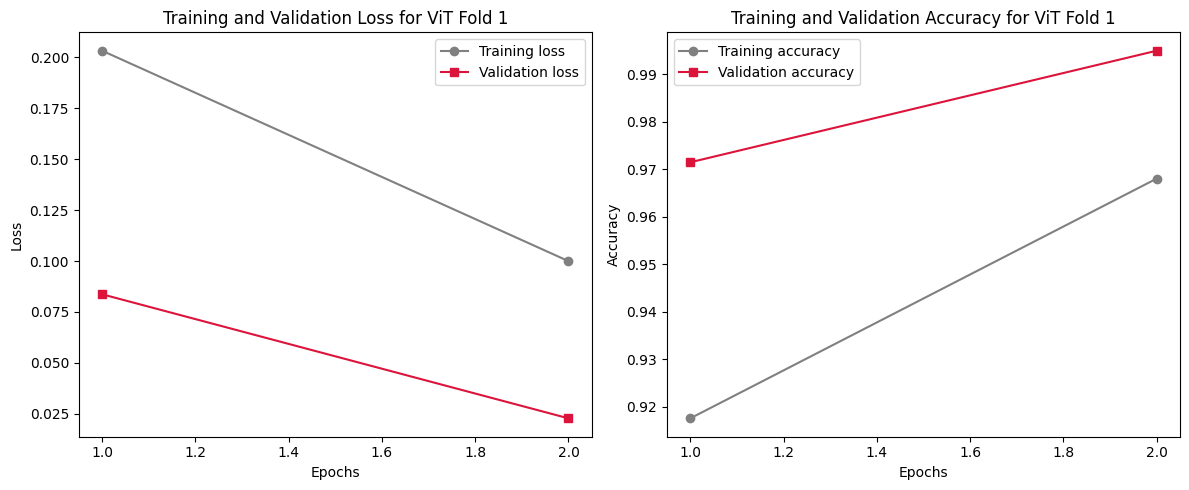

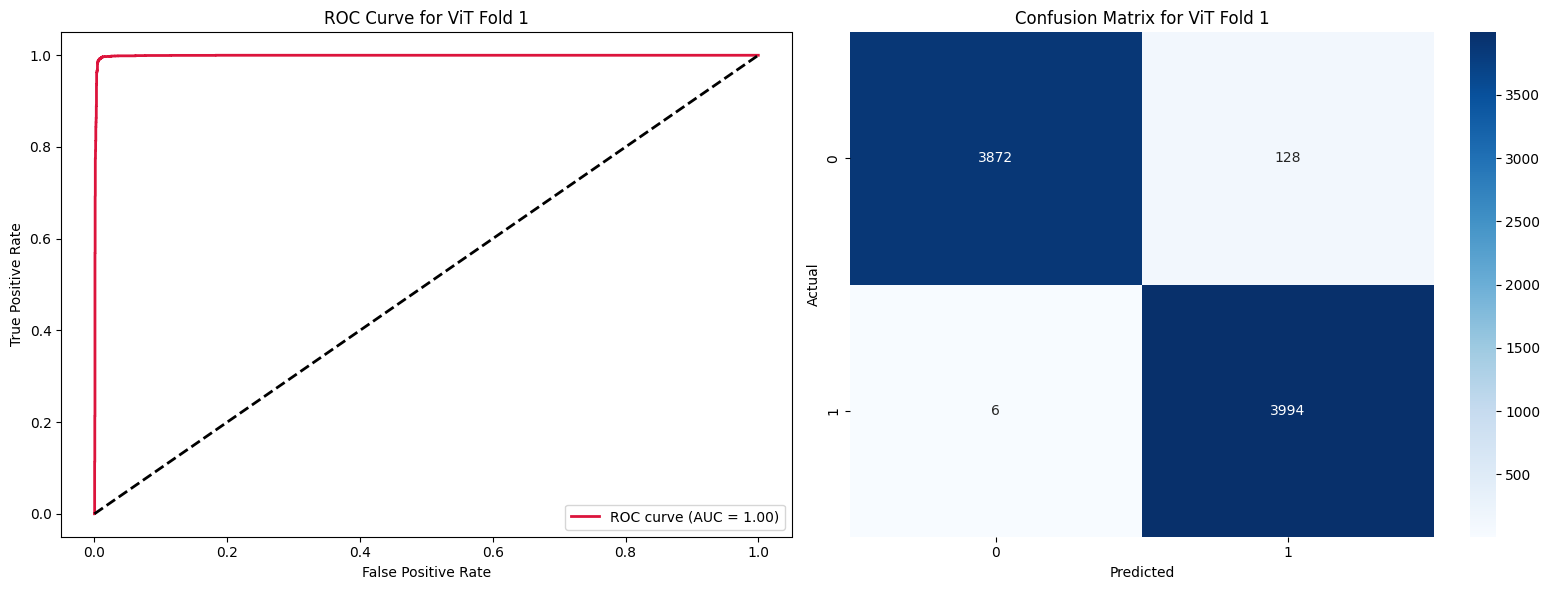


=== Fold 2/5 for model ViT ===
Train indices length: 16000, Val indices length: 4000
Fine-tuning mode: last_n_blocks with last_n=6
Model wrapped in DataParallel.


Epoch 1/2:  31%|███████████████▌                                   | 153/500 [00:32<01:13,  4.74it/s]

In [ ]:
import os
import time  # Importing time for timers
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import timm
import numpy as np
from astropy.io import fits
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
from torchvision import transforms
from torchvision.transforms import RandomApply

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

import pandas as pd  # For DataFrame handling
from IPython.display import display  # For displaying DataFrames in Jupyter

# Suppress potential warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


def initialize_model(model_name, num_classes, pretrained=False, stochastic_depth_prob=0.1, 
                    fine_tune_mode="classification_head", last_n=6):
    """
    Initialize a model from the given model_name without ImageNet pretraining and
    allow for a custom number of input channels (5).

    Args:
        model_name (str): One of [ViT, CaiT, DeiT, DeiT3, Swin, Twins_SVT, Twins_PCPVT, PiT, MLP-Mixer].
        num_classes (int): Number of output classes.
        pretrained (bool): Whether to load a pretrained model. Here we set it to False.
        stochastic_depth_prob (float): The stochastic depth probability for supported models.
        fine_tune_mode (str): 'classification_head', 'last_n_blocks', 'half', or 'all_blocks'.
        last_n (int): Number of blocks/layers to unfreeze if using 'last_n_blocks'.

    Returns:
        model: The initialized and partially unfrozen model.
    """
    def freeze_all(model):
        for p in model.parameters():
            p.requires_grad = False

    def unfreeze_head(model):
        if hasattr(model, 'head') and isinstance(model.head, nn.Module):
            for p in model.head.parameters():
                p.requires_grad = True
        elif hasattr(model, 'classifier') and isinstance(model.classifier, nn.Module):
            for p in model.classifier.parameters():
                p.requires_grad = True
        elif hasattr(model, 'classifier_head') and isinstance(model.classifier_head, nn.Module):
            for p in model.classifier_head.parameters():
                p.requires_grad = True
        else:
            # Fallback: find a module containing 'head' or 'classifier'
            for name, module in model.named_modules():
                if 'head' in name or 'classifier' in name:
                    for p in module.parameters():
                        p.requires_grad = True

    def unfreeze_last_n_blocks(blocks, n):
        if n > len(blocks):
            n = len(blocks)
        for block in blocks[-n:]:
            for p in block.parameters():
                p.requires_grad = True

    def unfreeze_half_blocks(blocks):
        n = len(blocks) // 2
        unfreeze_last_n_blocks(blocks, n)

    def unfreeze_all_blocks(blocks):
        for block in blocks:
            for p in block.parameters():
                p.requires_grad = True

    # Initialize the model with 5 input channels and no pretrained weights
    if model_name == 'ViT':
        model = timm.create_model('vit_base_patch16_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'CaiT':
        model = timm.create_model('cait_s24_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'DeiT':
        model = timm.create_model('deit_base_patch16_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'DeiT3':
        model = timm.create_model('deit3_base_patch16_224',
                                  pretrained=pretrained,
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'Swin':
        model = timm.create_model('swin_base_patch4_window7_224',
                                  pretrained=pretrained,
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob,
                                  num_classes=num_classes)
        ft_attr = 'layers'
    elif model_name == 'Twins_SVT':
        model = timm.create_model('twins_svt_base',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'stages' if hasattr(model, 'stages') else None
    elif model_name == 'Twins_PCPVT':
        model = timm.create_model('twins_pcpvt_base',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'stages' if hasattr(model, 'stages') else None
    elif model_name == 'PiT':
        model = timm.create_model('pit_b_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    elif model_name == 'MLP-Mixer':
        model = timm.create_model('mixer_b16_224',
                                  pretrained=pretrained, 
                                  in_chans=5,
                                  drop_path_rate=stochastic_depth_prob)
        model.head = nn.Linear(model.head.in_features, num_classes)
        ft_attr = 'blocks'
    else:
        raise ValueError(f"Model {model_name} not recognized.")

    # Freeze everything initially
    freeze_all(model)
    # Unfreeze the classification head
    unfreeze_head(model)

    if fine_tune_mode == "classification_head":
        return model

    # Otherwise, unfreeze more parameters according to the chosen mode
    if fine_tune_mode == "all_blocks":
        if ft_attr and hasattr(model, ft_attr):
            blocks = getattr(model, ft_attr)
            unfreeze_all_blocks(blocks)
        else:
            # Fallback: parameter-based unfreezing
            for n, p in model.named_parameters():
                if not p.requires_grad:
                    p.requires_grad = True
    elif fine_tune_mode == "last_n_blocks":
        if ft_attr and hasattr(model, ft_attr):
            blocks = getattr(model, ft_attr)
            unfreeze_last_n_blocks(blocks, last_n)
        else:
            # Fallback: parameter-based unfreezing
            all_params = list(model.named_parameters())
            frozen = [(n, p) for (n, p) in all_params if not p.requires_grad]
            if last_n > len(frozen):
                last_n = len(frozen)
            for (n, p) in frozen[-last_n:]:
                p.requires_grad = True
    elif fine_tune_mode == "half":
        if ft_attr and hasattr(model, ft_attr):
            blocks = getattr(model, ft_attr)
            unfreeze_half_blocks(blocks)
        else:
            # Fallback: parameter-based unfreezing
            all_params = list(model.named_parameters())
            frozen = [(n, p) for (n, p) in all_params if not p.requires_grad]
            half_n = len(frozen) // 2
            for (n, p) in frozen[-half_n:]:
                p.requires_grad = True
    else:
        raise ValueError("fine_tune_mode must be one of: 'classification_head', 'last_n_blocks', 'half', 'all_blocks'")

    return model


def save_checkpoint(model, optimizer, epoch, val_loss, fold, model_name, checkpoints_dir="checkpoints"):
    """
    Save the model checkpoint.

    Args:
        model: The model to save.
        optimizer: The optimizer state.
        epoch (int): Current epoch number.
        val_loss (float): Validation loss.
        fold (int): Current fold number.
        model_name (str): Name of the model.
        checkpoints_dir (str): Directory to save checkpoints.
    """
    os.makedirs(checkpoints_dir, exist_ok=True)
    model_to_save = model.module if hasattr(model, 'module') else model
    checkpoint_path = os.path.join(checkpoints_dir, f"model_{model_name}_fold_{fold+1}_best.pth")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model_to_save.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_loss': val_loss
    }, checkpoint_path)
    print(f"Checkpoint saved at {checkpoint_path}")


def train_one_fold(model, train_loader, val_loader, device, num_epochs=2, patience=1, fold=0, model_name="model"):
    """
    Train the model for one fold.

    Args:
        model: The model to train.
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        device: Device to train on.
        num_epochs (int): Maximum number of epochs.
        patience (int): Early stopping patience.
        fold (int): Current fold number.
        model_name (str): Name of the model.

    Returns:
        history (dict): Training and validation loss and accuracy history.
        all_labels_np (np.ndarray): True labels.
        all_preds_np (np.ndarray): Predicted labels.
        all_preds_probs (np.ndarray): Predicted probabilities.
        auc_roc (float): ROC AUC score.
        f1 (float): F1 score.
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-3)  # Reduced lr and wd

    best_loss = float('inf')
    epochs_no_improve = 0

    # For storing metrics
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    all_preds = []
    all_labels = []
    all_probs = []

    total_start_time = time.perf_counter()  # Start timer for the entire fold

    for epoch in range(num_epochs):
        epoch_start_time = time.perf_counter()  # Start timer for the epoch
        model.train()
        running_loss = 0.0
        correct_train = 0

        # Progress bar for training
        train_iter = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
        for X_batch, y_batch in train_iter:
            X_batch = X_batch.to(device, non_blocking=True)
            y_batch = y_batch.to(device, non_blocking=True)
            optimizer.zero_grad()

            outputs = model(X_batch)
            
            # Check outputs for NaN or Inf
            if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                print("Model outputs contain NaN or Inf.")
                raise ValueError("Invalid model outputs.")

            loss = criterion(outputs, y_batch)
            
            # Check loss for NaN or Inf
            if torch.isnan(loss) or torch.isinf(loss):
                print("Loss is NaN or Inf.")
                raise ValueError("Invalid loss.")

            loss.backward()
            
            # Check gradients for NaN or Inf
            for name, param in model.named_parameters():
                if param.grad is not None:
                    if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
                        print(f"Gradient issue in parameter: {name}")
                        raise ValueError("Invalid gradients.")

            # Clip gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()

            running_loss += loss.item() * X_batch.size(0)
            preds = outputs.argmax(dim=1)
            correct_train += (preds == y_batch).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct_train / len(train_loader.dataset)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        # Training time for the epoch
        epoch_end_time = time.perf_counter()
        epoch_duration = epoch_end_time - epoch_start_time

        # Validation
        val_start_time = time.perf_counter()  # Start timer for validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        preds_list = []
        labels_list = []
        probs_list = []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val = X_val.to(device, non_blocking=True)
                y_val = y_val.to(device, non_blocking=True)
                outputs = model(X_val)
                
                # Check outputs for NaN or Inf
                if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                    print("Validation model outputs contain NaN or Inf.")
                    raise ValueError("Invalid validation model outputs.")

                loss = criterion(outputs, y_val)
                
                # Check loss for NaN or Inf
                if torch.isnan(loss) or torch.isinf(loss):
                    print("Validation loss is NaN or Inf.")
                    raise ValueError("Invalid validation loss.")

                val_loss += loss.item() * X_val.size(0)
                preds = outputs.argmax(dim=1)
                correct_val += (preds == y_val).sum().item()

                preds_list.extend(preds.cpu().numpy())
                labels_list.extend(y_val.cpu().numpy())

                probs = torch.softmax(outputs, dim=1)
                probs_list.extend(probs.cpu().numpy())

        val_end_time = time.perf_counter()
        val_duration = val_end_time - val_start_time

        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / len(val_loader.dataset)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        all_preds.extend(preds_list)
        all_labels.extend(labels_list)
        all_probs.extend(probs_list)

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}% | "
              f"Epoch Time: {epoch_duration:.2f}s | Val Time: {val_duration:.2f}s")

        # Checkpoint if best
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
            save_checkpoint(model, optimizer, epoch, val_loss, fold, model_name)
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print("Early stopping triggered.")
                break

    total_end_time = time.perf_counter()
    total_duration = total_end_time - total_start_time
    print(f"Total time for Fold {fold+1}: {total_duration:.2f}s")

    # After training, compute metrics
    # Assuming multi-class classification
    num_classes = model.module.head.out_features if hasattr(model, 'module') else model.head.out_features
    all_labels_np = np.array(all_labels)
    all_preds_np = np.array(all_preds)
    all_probs_np = np.array(all_probs)

    # Binarize the labels for ROC AUC
    all_labels_binarized = label_binarize(all_labels_np, classes=np.arange(num_classes))
    if all_labels_binarized.shape[1] == 1:
        # Handle binary classification case
        all_labels_binarized = np.hstack((1 - all_labels_binarized, all_labels_binarized))

    # Compute ROC AUC
    try:
        auc_roc = roc_auc_score(all_labels_binarized, all_probs_np, average='macro', multi_class='ovr')
    except ValueError:
        auc_roc = float('nan')  # Handle cases where ROC AUC cannot be computed

    # Compute F1 Score
    f1 = f1_score(all_labels_np, all_preds_np, average='macro')

    return history, all_labels_np, all_preds_np, all_probs_np, auc_roc, f1


def compute_channel_stats(X_tensor):
    """
    Compute per-channel mean and standard deviation.

    Args:
        X_tensor (torch.Tensor): Input tensor of shape (N, C, H, W).

    Returns:
        means (torch.Tensor): Mean for each channel.
        stds (torch.Tensor): Standard deviation for each channel.
    """
    # Compute per-channel mean and std
    means = X_tensor.mean(dim=(0, 2, 3))
    stds = X_tensor.std(dim=(0, 2, 3))
    return means, stds


class FITSDataset(Dataset):
    def __init__(self, X, y, transform=None):
        """
        Initialize the FITSDataset.

        Args:
            X (torch.Tensor): Input images tensor of shape (N, C, H, W).
            y (torch.Tensor): Labels tensor of shape (N,).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        img = self.X[idx]  # (5, H, W) tensor
        if self.transform is not None:
            img = self.transform(img)
        label = self.y[idx]
        return img, label


def plot_combined_metrics(fpr, tpr, roc_auc, cm, classes, model_name, fold, model_color):
    """
    Plot the ROC curve on the left and the Confusion Matrix on the right.
    Only displays the figure inline without saving.

    Args:
        fpr (dict): False positive rates for each class.
        tpr (dict): True positive rates for each class.
        roc_auc (dict): AUC scores for each class.
        cm (np.ndarray): Confusion matrix.
        classes (list or np.ndarray): List of class labels.
        model_name (str): Name of the model.
        fold (int): Fold number.
        model_color (str): Color assigned to the model.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from itertools import cycle

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # === Left Subplot: ROC Curve ===
    ax1 = axes[0]
    if len(classes) == 2:
        # Binary classification: plot ROC for the positive class only
        pos_class = classes[1]  # Assuming the second class is the positive class
        ax1.plot(fpr[1], tpr[1], color=model_color,
                 lw=2, label=f'ROC curve (AUC = {roc_auc[1]:0.2f})')
        ax1.plot([0, 1], [0, 1], 'k--', lw=2)
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-0.05, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'ROC Curve for {model_name} Fold {fold+1}', color='black')
        ax1.legend(loc="lower right")
    else:
        # Multi-class classification: plot ROC for each class using model_color and different line styles
        line_styles = cycle(['-', '--', '-.', ':', '-', '--', '-.', ':', '-'])
        for i, ls in zip(range(len(classes)), line_styles):
            ax1.plot(fpr[i], tpr[i], color=model_color, linestyle=ls, lw=2,
                     label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:0.2f})')
        ax1.plot([0, 1], [0, 1], 'k--', lw=2)
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-0.05, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'ROC Curves for {model_name} Fold {fold+1}', color='black')
        ax1.legend(loc="lower right")
    
    # === Right Subplot: Confusion Matrix ===
    ax2 = axes[1]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes, ax=ax2)
    ax2.set_ylabel('Actual')
    ax2.set_xlabel('Predicted')
    ax2.set_title(f'Confusion Matrix for {model_name} Fold {fold+1}', color='black')
    
    plt.tight_layout()
    
    # Display the figure inline
    display(fig)
    
    # Close the figure to free memory
    plt.close()


def plot_learning_curves(history, model_name, fold, model_color):
    """
    Plot the learning curves (loss and accuracy) for training and validation.
    Only displays the figure inline without saving.

    Args:
        history (dict): Dictionary containing training and validation loss and accuracy.
        model_name (str): Name of the model.
        fold (int): Fold number.
        model_color (str): Color assigned to the model.
    """
    import matplotlib.pyplot as plt

    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12,5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'o-', color='grey', label='Training loss')
    plt.plot(epochs, history['val_loss'], 's-', color=model_color, label='Validation loss')
    plt.title(f'Training and Validation Loss for {model_name} Fold {fold+1}', color='black')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], 'o-', color='grey', label='Training accuracy')
    plt.plot(epochs, history['val_acc'], 's-', color=model_color, label='Validation accuracy')
    plt.title(f'Training and Validation Accuracy for {model_name} Fold {fold+1}', color='black')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    
    # Display the figure inline
    display(plt.gcf())
    
    # Close the figure to free memory
    plt.close()


def plot_aggregated_roc_curves(model_roc_data, num_classes, save_dir="plots"):
    """
    Plot aggregated ROC curves for all models, including the Ensemble.

    Args:
        model_roc_data (dict): Dictionary where keys are model names and values are lists of (fpr, tpr) tuples per fold.
        num_classes (int): Number of classes.
        save_dir (str): Directory to save the plot.
    """
    # No longer saving the plots to disk; only display inline
    plt.figure(figsize=(12, 8))

    colors = {
        'ViT': 'crimson',
        'MLP-Mixer': 'tomato',
        'CvT': 'darkred',
        'Swin': 'indigo',
        'CaiT': 'royalblue',
        'DeiT': 'cadetblue',
        'DeiT3': 'dodgerblue',
        'Twins_SVT': 'lightgreen',
        'Twins_PCPVT': 'mediumseagreen',
        'PiT': 'dimgrey',
        'Ensemble': 'darkgoldenrod',
        'Random': 'black'
    }

    for model_name, roc_list in model_roc_data.items():
        if not roc_list:
            continue  # Skip models with no ROC data

        if model_name == 'Ensemble':
            # For Ensemble, average the ROC curves across folds
            mean_fpr = np.linspace(0, 1, 100)
            tprs = []
            aucs = []
            for fpr, tpr in roc_list:
                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(auc(fpr, tpr))
            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            plt.plot(mean_fpr, mean_tpr, color=colors.get(model_name, 'black'),
                     lw=2, label=f'{model_name} (AUC = {mean_auc:.2f})')
        else:
            # For individual models, plot each fold's ROC curve
            for fpr, tpr in roc_list:
                plt.plot(fpr, tpr, color=colors.get(model_name, 'black'),
                         lw=1, alpha=0.3, label=f'{model_name} Fold ROC')

            # Optionally, plot the mean ROC curve for each model
            mean_fpr = np.linspace(0, 1, 100)
            tprs = []
            aucs = []
            for fpr, tpr in roc_list:
                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(auc(fpr, tpr))
            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            plt.plot(mean_fpr, mean_tpr, color=colors.get(model_name, 'black'),
                     lw=2, label=f'{model_name} Mean ROC (AUC = {mean_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Aggregated ROC Curves for All Models Including Ensemble')
    plt.legend(loc="lower right")
    plt.tight_layout()

    # Display the figure inline
    display(plt.gcf())

    # Close the figure to free memory
    plt.close()


if __name__ == "__main__":
    images_dir = "/home/parlange/datasets/mini_sample/images"
    metadata_file = "/home/parlange/datasets/mini_sample/metadata_catalog.fits"

    bands = ['g', 'r', 'i', 'z', 'y']
    image_files = {
        'g': 'image_catalog_g.fits',
        'r': 'image_catalog_r.fits',
        'i': 'image_catalog_i.fits',
        'z': 'image_catalog_z.fits',
        'y': 'image_catalog_y.fits'
    }

    band_data = []
    shapes = []
    for b in bands:
        file_path = os.path.join(images_dir, image_files[b])
        with fits.open(file_path) as hdul:
            data = hdul[0].data
            print(f"Shape for {b} band: {data.shape}")
            # Replace NaN and Inf with zeros
            data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)
            band_data.append(data)
            shapes.append(data.shape)

    unique_shapes = set(shapes)
    if len(unique_shapes) != 1:
        raise ValueError(f"Inconsistent shapes among bands: {unique_shapes}")

    X = np.stack(band_data, axis=1)
    print("Final X shape:", X.shape)

    with fits.open(metadata_file) as hdul:
        meta_data = hdul[1].data
        y = np.array(meta_data['label'])
        print("y shape:", y.shape)

    y = y.astype(np.int64)

    X_tensor = torch.from_numpy(X).float()   # (N, 5, H, W)
    y_tensor = torch.from_numpy(y).long()    # (N,)

    # Check for remaining NaNs or Infs
    if torch.isnan(X_tensor).any():
        print("X_tensor contains NaN values. Replacing with 0.")
        X_tensor = torch.nan_to_num(X_tensor, nan=0.0, posinf=0.0, neginf=0.0)
    if torch.isinf(X_tensor).any():
        print("X_tensor contains Inf values. Replacing with 0.")
        X_tensor = torch.nan_to_num(X_tensor, nan=0.0, posinf=0.0, neginf=0.0)

    # Compute channel statistics
    means, stds = compute_channel_stats(X_tensor)
    print("Per-channel means:", means)
    print("Per-channel stds:", stds)

    # Check for NaN or Inf in means and stds
    if torch.isnan(means).any() or torch.isnan(stds).any():
        print("Computed means or stds contain NaN. Replacing with 0.5 and 0.5 respectively.")
        means = torch.where(torch.isnan(means), torch.tensor(0.5), means)
        stds = torch.where(torch.isnan(stds), torch.tensor(0.5), stds)
    if torch.isinf(means).any() or torch.isinf(stds).any():
        print("Computed means or stds contain Inf. Replacing with 1.0 and 1.0 respectively.")
        means = torch.where(torch.isinf(means), torch.tensor(1.0), means)
        stds = torch.where(torch.isinf(stds), torch.tensor(1.0), stds)

    # Define training and validation transforms with normalization
    train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        RandomApply([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomRotation(degrees=30),
            transforms.RandomResizedCrop(size=224, scale=(0.8, 1.2)),
            transforms.RandomPerspective(distortion_scale=0.4, p=0.5),
            transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
        ], p=0.5),
        transforms.Normalize(mean=means.tolist(),
                             std=stds.tolist())
    ])

    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Normalize(mean=means.tolist(),
                             std=stds.tolist())
    ])

    dataset = FITSDataset(X_tensor, y_tensor)
    N = len(dataset)
    num_classes = len(torch.unique(y_tensor))
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')
    if torch.cuda.is_available():
        print(f'Number of GPUs: {torch.cuda.device_count()}')

    # List of models to train
    model_names = ['ViT', 'CaiT', 'DeiT', 'DeiT3', 'Swin', 
                  'Twins_SVT', 'Twins_PCPVT', 'PiT', 'MLP-Mixer']

    # Define per-model fine-tuning configurations with 'last_n_blocks' mode and exact last_n values
    model_config = {
        'ViT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},          # 12 blocks / 2 = 6
        'CaiT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 12},        # 24 blocks / 2 = 12
        'DeiT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},         # 12 blocks / 2 = 6
        'DeiT3': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},        # 12 blocks / 2 = 6
        'Swin': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},         # 12 blocks / 2 = 6
        'Twins_SVT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},    # 12 blocks / 2 = 6
        'Twins_PCPVT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 2},  # 4 blocks / 2 = 2
        'PiT': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},          # 12 blocks / 2 = 6
        'MLP-Mixer': {'fine_tune_mode': 'last_n_blocks', 'last_n': 6},    # 12 blocks / 2 = 6
    }

    k = 5
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # To store overall results
    model_metrics = {model: {'auc_roc': [], 'f1': []} for model in model_names}
    # To store ROC data for aggregated plotting
    model_roc_data = {model: [] for model in model_names}

    # Define your colors dictionary
    colors = {
        'ViT': 'crimson',
        'MLP-Mixer': 'tomato',
        'CvT': 'darkred',
        'Swin': 'indigo',
        'CaiT': 'royalblue',
        'DeiT': 'cadetblue',
        'DeiT3': 'dodgerblue',
        'Twins_SVT': 'lightgreen',
        'Twins_PCPVT': 'mediumseagreen',
        'PiT': 'dimgrey',
        'Ensemble': 'darkgoldenrod',
        'Random': 'black'
    }

    # Initialize a dictionary to store predictions per fold across all models
    fold_predictions = {fold: {'labels': None, 'probs': []} for fold in range(k)}

    for model_name in model_names:
        print(f"\n==== Training Model: {model_name} ====\n")
        fold_results = []
        # Iterate through each fold
        for fold, (train_idx, val_idx) in enumerate(skf.split(np.arange(N), y_tensor.cpu().numpy())):
            print(f"\n=== Fold {fold+1}/{k} for model {model_name} ===")
            print(f"Training: {len(train_idx)}, Validation: {len(val_idx)}")

            train_subset = Subset(FITSDataset(X_tensor[train_idx], y_tensor[train_idx], transform=train_transform), range(len(train_idx)))
            val_subset = Subset(FITSDataset(X_tensor[val_idx], y_tensor[val_idx], transform=val_transform), range(len(val_idx)))

            pin_memory = torch.cuda.is_available()
            train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=pin_memory)
            val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=4, pin_memory=pin_memory)

            # Get model configuration
            config = model_config.get(model_name, {'fine_tune_mode': 'classification_head', 'last_n': 6})
            fine_tune_mode = config['fine_tune_mode']
            last_n = config['last_n'] if config['last_n'] is not None else 6  # Default to 6 if not set

            # Print the fine-tuning mode and last_n if applicable
            if fine_tune_mode == 'last_n_blocks':
                print(f"Fine-tuning mode: {fine_tune_mode} with last_n={last_n}")
            else:
                print(f"Fine-tuning mode: {fine_tune_mode}")

            model = initialize_model(model_name, num_classes, pretrained=False, fine_tune_mode=fine_tune_mode, last_n=last_n)

            model = model.to(device)
            if torch.cuda.is_available() and torch.cuda.device_count() > 1:
                model = nn.DataParallel(model)
                print("Model wrapped in DataParallel.")

            try:
                history, all_labels_np, all_preds_np, all_preds_probs, auc_roc, f1 = train_one_fold(
                    model, train_loader, val_loader, device, num_epochs=2, patience=1, fold=fold, model_name=model_name
                )
                fold_results.append((auc_roc, f1))
                model_metrics[model_name]['auc_roc'].append(auc_roc)
                model_metrics[model_name]['f1'].append(f1)

                # Assign true labels to the fold if not already assigned
                if fold_predictions[fold]['labels'] is None:
                    fold_predictions[fold]['labels'] = all_labels_np

                # Append the predicted probabilities of the current model to the fold
                fold_predictions[fold]['probs'].append(all_preds_probs)

                # Retrieve the model's color from the colors dictionary
                model_color = colors.get(model_name, 'black')  # Default to 'black' if not found

                # Plot learning curves (only display, no save)
                plot_learning_curves(history, model_name, fold, model_color=model_color)

                # Compute confusion matrix
                cm = confusion_matrix(all_labels_np, all_preds_np)

                # Compute ROC curves
                # Binarize the labels for ROC
                all_labels_binarized = label_binarize(all_labels_np, classes=np.arange(num_classes))
                if all_labels_binarized.shape[1] == 1:
                    # Handle binary classification case
                    all_labels_binarized = np.hstack((1 - all_labels_binarized, all_labels_binarized))

                fpr = dict()
                tpr = dict()
                roc_auc_dict = dict()
                for i in range(num_classes):
                    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized[:, i], all_preds_probs[:, i])
                    roc_auc_dict[i] = auc(fpr[i], tpr[i])

                # Store ROC data for aggregated plotting
                model_roc_data[model_name].append((fpr, tpr))

                # Plot combined metrics (ROC and Confusion Matrix) (only display, no save)
                plot_combined_metrics(fpr, tpr, roc_auc_dict, cm, classes=np.arange(num_classes), 
                                      model_name=model_name, fold=fold, model_color=model_color)

            except ValueError as e:
                print(f"Training stopped due to error: {e}")
                break  # Optionally, continue with next fold or model

        if fold_results:
            avg_auc = np.mean([res[0] for res in fold_results])
            avg_f1 = np.mean([res[1] for res in fold_results])
            print(f"\nResults for {model_name}: Average AUC-ROC: {avg_auc:.4f}, Average F1 Score: {avg_f1:.4f}")
        else:
            print(f"\nNo results for {model_name} due to training issues.")

    # After all models have been trained, compute the ensemble ROC curves
    # Initialize a list to store ensemble ROC data
    ensemble_roc_data = []

    for fold in range(k):
        print(f"\nProcessing Ensemble for Fold {fold+1}/{k}")
        labels = fold_predictions[fold]['labels']
        probs_list = fold_predictions[fold]['probs']  # List of arrays from different models

        # Stack the probabilities to create a (num_models, num_samples, num_classes) array
        stacked_probs = np.stack(probs_list, axis=0)  # Shape: (num_models, num_samples, num_classes)

        # Compute the average predicted probabilities across models
        ensemble_probs = np.mean(stacked_probs, axis=0)  # Shape: (num_samples, num_classes)

        # Binarize the labels for ROC
        labels_binarized = label_binarize(labels, classes=np.arange(num_classes))
        if labels_binarized.shape[1] == 1:
            # Handle binary classification case
            labels_binarized = np.hstack((1 - labels_binarized, labels_binarized))

        # Compute ROC curves for ensemble
        fpr = dict()
        tpr = dict()
        roc_auc_dict = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], ensemble_probs[:, i])
            roc_auc_dict[i] = auc(fpr[i], tpr[i])

        # Append to ensemble ROC data
        ensemble_roc_data.append((fpr, tpr, roc_auc_dict))

    # Add Ensemble ROC data to model_roc_data
    model_roc_data['Ensemble'] = []
    for fold in range(k):
        fpr, tpr, roc_auc_dict = ensemble_roc_data[fold]
        model_roc_data['Ensemble'].append((fpr, tpr))

    # After all models have been trained, create and display the rankings
    ranking_auc = sorted(model_metrics.items(), key=lambda x: np.nanmean(x[1]['auc_roc']), reverse=True)
    ranking_f1 = sorted(model_metrics.items(), key=lambda x: np.nanmean(x[1]['f1']), reverse=True)

    # Create DataFrames for rankings
    ranking_auc_df = pd.DataFrame(ranking_auc, columns=['Model', 'Metrics'])
    ranking_auc_df['Average AUC-ROC'] = ranking_auc_df['Metrics'].apply(lambda x: np.nanmean(x['auc_roc']))
    ranking_auc_df = ranking_auc_df.drop('Metrics', axis=1).sort_values(by='Average AUC-ROC', ascending=False).reset_index(drop=True)

    ranking_f1_df = pd.DataFrame(ranking_f1, columns=['Model', 'Metrics'])
    ranking_f1_df['Average F1 Score'] = ranking_f1_df['Metrics'].apply(lambda x: np.nanmean(x['f1']))
    ranking_f1_df = ranking_f1_df.drop('Metrics', axis=1).sort_values(by='Average F1 Score', ascending=False).reset_index(drop=True)

    # Display the rankings in the notebook
    print("\n==== Model Ranking Based on AUC-ROC ====")
    display(ranking_auc_df)

    print("\n==== Model Ranking Based on F1 Score ====")
    display(ranking_f1_df)

    # Plot aggregated ROC curves for all models, including Ensemble
    print("\n==== Plotting Aggregated ROC Curves for All Models Including Ensemble ====")
    plot_aggregated_roc_curves(model_roc_data, num_classes, save_dir="plots")  # save_dir is unused now

    # Optionally, save the ranking results to a file
    with open("model_ranking.txt", "w") as f:
        f.write("Model Ranking Based on AUC-ROC:\n")
        for rank, (model, metrics) in enumerate(ranking_auc, start=1):
            f.write(f"{rank}. {model} - Average AUC-ROC: {np.nanmean(metrics['auc_roc']):.4f}\n")
        
        f.write("\nModel Ranking Based on F1 Score:\n")
        for rank, (model, metrics) in enumerate(ranking_f1, start=1):
            f.write(f"{rank}. {model} - Average F1 Score: {np.nanmean(metrics['f1']):.4f}\n")
    
    print("\nModel rankings have been saved to 'model_ranking.txt'.")
